# Includes

In [1]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc, DEF_INTERVAL, DEF_SYMBOL, SYMBOLS, INTERVALS, TOTAL_CANDLES
from capture_plot import CaptureOnClick

%matplotlib widget



In [2]:
print(mpf.__version__)

0.12.10b0


# Simple flow

## Initialize data processor

- SYMBOLS = 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT'
- INTERVALS = '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M'
- TOTAL_CANDLES = 100
- DEF_SYMBOL = 'BTCUSDT'
- DEF_INTERVAL ='15m'


new pairs can be added to SYMBOLS in data_proc to extended datastore structure 

In [3]:
#initialize data processor
dp = DataProc('.\\.data\\ntb\\v0.0504a\\')

print(dp)

## Aquire selections
* Left click places buy mark
* Right click places sell mark
* Alt+Right click removes the nearest mark

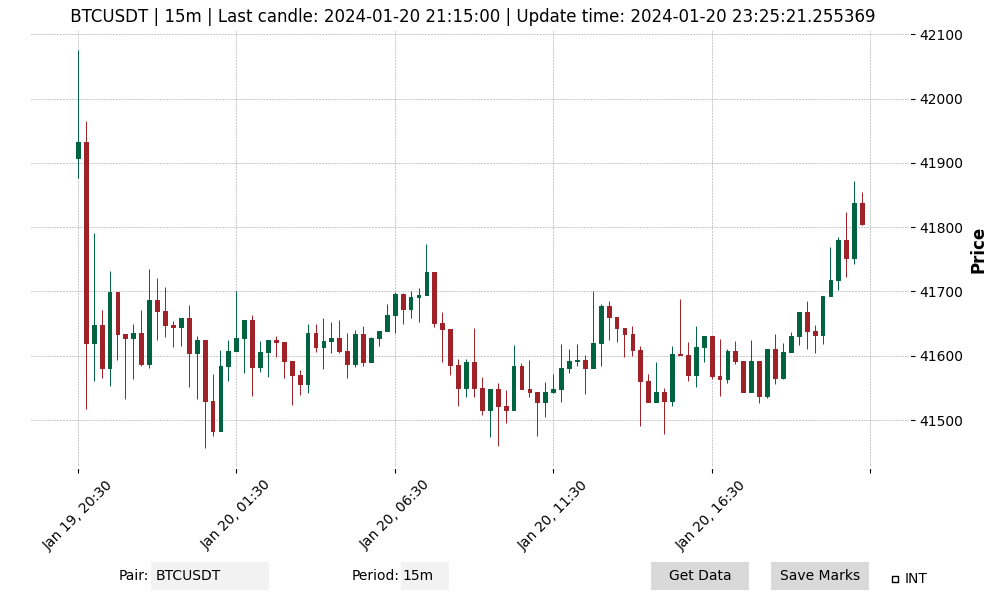

In [4]:
plt = CaptureOnClick(data_proc=dp)
#plt = CaptureOnClick(pair_df=pair_df, data_proc=dp)

# Utils 
* Load data (from Binance)
* Show collected symbols(pairs)/intervals
* Print debug output (captured over the plot)
* See into data details
  

In [ ]:
#get_data adds the requested pair/interval to the datastore and sets dp.pair_df
dp.get_data('BTCUSDT', '4h')
print(dp.pair_df[0:5])

In [ ]:
df = pd.DataFrame(dp.data_map)

#show non empty pair/interval data
for pair, intervals in df.items():
        for interval, values in intervals.items():
            if values['Updated'] is not None:
                print(f"Pair: {pair}, Interval: {interval}, StartDate: {values['StartDate']}, Updated: {values['Updated']}")

In [ ]:
print(plt.captured_output)

In [ ]:

#datamap initialized with SYMBOLS entries  each may hold OCHL data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore[DEF_SYMBOL][DEF_INTERVAL])

#default load:
last_updated = datamap[DEF_SYMBOL][DEF_INTERVAL]['Updated']
start_date = datamap[DEF_SYMBOL][DEF_INTERVAL]['StartDate']
end_date = datamap[DEF_SYMBOL][DEF_INTERVAL]['EndDate']


print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval}, between: {start_date} and {end_date}, loaded on {last_updated}  \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')

In [ ]:
del pd
del plt